In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Installing wordcloud for visualisation.
!pip install wordcloud

In [ ]:
# Importing the requisite packages used.
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from wordcloud import WordCloud

In [ ]:
# Extracting the IMDB Dataset of tweets for Sentimental Analysis.
csv_Path = "inputs.csv"
data_Frame = pd.read_csv(csv_Path)
data_Frame.drop(columns = ["Unnamed: 0.1","Unnamed: 0"], inplace=True)

# Replicating the dataset to perform operations on it.
data_Set = data_Frame.copy()

In [ ]:
data_Set

,Reviews,Sentiment
0,Bizarre horror movie filled with famous faces ...,Positive
1,"A solid, if unremarkable film. Matthau, as Ein...",Positive
2,It's a strange feeling to sit alone in a theat...,Positive
3,"You probably all already know this by now, but...",Positive
4,I saw the movie with two grown children. Altho...,Positive
...,...,...
49995,If you like to get a couple of fleeting glimps...,Negative
49996,When something can be anything you want it to ...,Negative
49997,"I had heard good things about ""States of Grace...",Negative
49998,"Well, this movie actually did have one redeemi...",Negative


In [ ]:
# Displaying the shape of the dataset.
data_Set.shape

(50000, 2)

In [ ]:
# Print the brief description of the dataset.
data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    50000 non-null  object
 1   Sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Displaying all the statistics of all the numerical variables of the dataset.
data_Set.describe()

,Reviews,Sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,Positive
freq,5,25000


In [ ]:
# check for null values in the dataset.
null_df = data_Set.isnull().sum()
print(null_df)

Reviews      0
Sentiment    0
dtype: int64


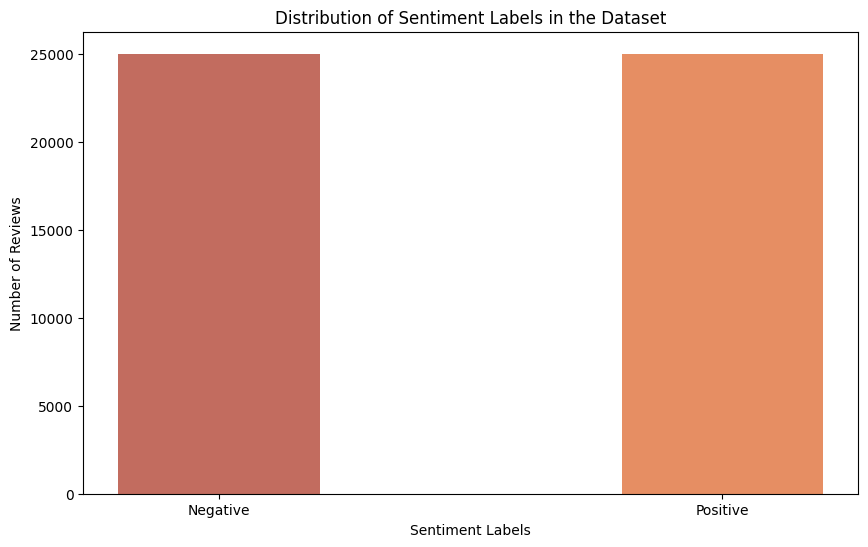

In [ ]:
# Bar graph visualisation of classification of tweets based on sentiments.
sentiment_counts = data_Set['Sentiment'].value_counts()
sentiment_labels = data_Set['Sentiment'].unique()
sentiment_labels.sort()
sentiment_counts = [sentiment_counts[label] for label in sentiment_labels]

colors=['#C26C5F','#E68E63']

plt.figure(figsize=(10, 6))
plt.bar(sentiment_labels, sentiment_counts, width=0.4, color=colors, align='center')

plt.xlabel('Sentiment Labels')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Labels in the Dataset')
plt.show()

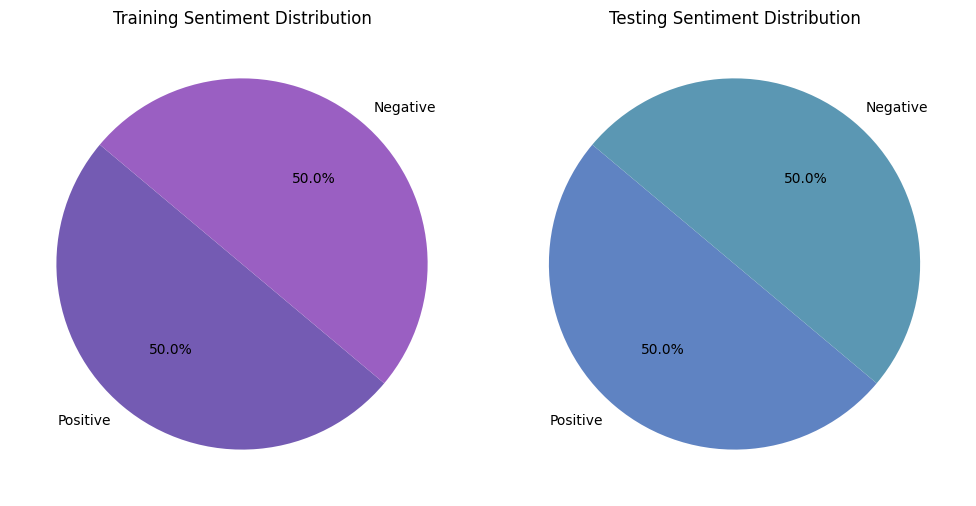

In [ ]:
# Pie chart visualisation of classification of tweets based on sentiments of training and testing dataset.
train_df = pd.read_csv("Inputs_Train.csv")
test_df = pd.read_csv("Inputs_test.csv")

# Calculate the proportions of positive and negative sentiments for training and testing datasets
train_pos = len(train_df[train_df['Sentiment'] == 'Positive']) / len(train_df)
train_neg = len(train_df[train_df['Sentiment'] == 'Negative']) / len(train_df)
test_pos = len(test_df[test_df['Sentiment'] == 'Positive']) / len(test_df)
test_neg = len(test_df[test_df['Sentiment'] == 'Negative']) / len(test_df)
colors_a = ["#745BB3","#9A5FC2"]
colors_b =["#5F83C2","#5B97B3"]
# Create a pie chart for the training dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie([train_pos, train_neg], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140, colors =colors_a)
plt.title('Training Sentiment Distribution')

# Create a pie chart for the testing dataset
plt.subplot(1, 2, 2)
plt.pie([test_pos, test_neg], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=140, colors=colors_b)
plt.title('Testing Sentiment Distribution')

# Show the pie charts
plt.tight_layout()
plt.show()


In [ ]:
# Importing nltk - Natural Language toolkit.
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package chat80 to /root/nltk_data...
       |   Package chat80 is already up-to-date!
       | Downloading package cmudict to /root/nltk_data...
       |   Package cmudict is already up-to-date!
       | Downloading package conll2000 to /root/nltk_data...
       |   Package conll2000 is already up-to-date!
       | Downloading package conll2002 to /root/nltk_data...
       |   Package conll2002 is already up-to-date!
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Package dependency_treebank is already up-to-date!
       | Downloading package genesis to /root/nltk_data...
       |   Package genesis is already up-to-date!
       | Downloading package gutenberg to /root/nltk_data...
       |   Package gutenberg is already


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Installing contractions.
!pip install contractions

In [ ]:
# Importing the requisite packages used.
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Columns that are required for building the model.
modelDataSet = data_Set[['Reviews', 'Sentiment']]
modelDataSet

,Reviews,Sentiment
0,Bizarre horror movie filled with famous faces ...,Positive
1,"A solid, if unremarkable film. Matthau, as Ein...",Positive
2,It's a strange feeling to sit alone in a theat...,Positive
3,"You probably all already know this by now, but...",Positive
4,I saw the movie with two grown children. Altho...,Positive
...,...,...
49995,If you like to get a couple of fleeting glimps...,Negative
49996,When something can be anything you want it to ...,Negative
49997,"I had heard good things about ""States of Grace...",Negative
49998,"Well, this movie actually did have one redeemi...",Negative


In [ ]:
# Displaying the shape of the dataset.
modelDataSet.shape

(50000, 2)

In [ ]:
# Displaying the initial 7 rows of the dataset.
pd.set_option('display.max_colwidth', None)
modelDataSet.head(n=7)

,Reviews,Sentiment
0,"Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's ""Flamingo Road"") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of ""Rosemary's Baby"" and ""The Exorcist""--but what a combination! Based on the best-seller by Jeffrey Konvitz, ""The Sentinel"" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbeat ending with skill. ***1/2 from ****",Positive
1,"A solid, if unremarkable film. Matthau, as Einstein, was wonderful. My favorite part, and the only thing that would make me go out of my way to see this again, was the wonderful scene with the physicists playing badmitton, I loved the sweaters and the conversation while they waited for Robbins to retrieve the birdie.",Positive
2,"It's a strange feeling to sit alone in a theater occupied by parents and their rollicking kids. I felt like instead of a movie ticket, I should have been given a NAMBLA membership.<br /><br />Based upon Thomas Rockwell's respected Book, How To Eat Fried Worms starts like any children's story: moving to a new town. The new kid, fifth grader Billy Forrester was once popular, but has to start anew. Making friends is never easy, especially when the only prospect is Poindexter Adam. Or Erica, who at 4 1/2 feet, is a giant.<br /><br />Further complicating things is Joe the bully. His freckled face and sleeveless shirts are daunting. He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it. But not immediately. No, the death ring unleashes a poison that kills you in the eight grade.<br /><br />Joe and his axis of evil welcome Billy by smuggling a handful of slimy worms into his thermos. Once discovered, Billy plays it cool, swearing that he eats worms all the time. Then he throws them at Joe's face. Ewww! To win them over, Billy reluctantly bets that he can eat 10 worms. Fried, boiled, marinated in hot sauce, squashed and spread on a peanut butter sandwich. Each meal is dubbed an exotic name like the ""Radioactive Slime Delight,"" in which the kids finally live out their dream of microwaving a living organism.<br /><br />If you've ever met me, you'll know that I have an uncontrollably hearty laugh. I felt like a creep erupting at a toddler whining that his ""dilly dick"" hurts. But Fried Worms is wonderfully disgusting. Like a G-rated Farrelly brothers film, it is both vomitous and delightful.<br /><br />Writer/director Bob Dolman is also a savvy storyteller. To raise the stakes the worms must be consumed by 7 pm. In addition Billy holds a dark secret: he has an ultra-sensitive stomach.<br /><br />Dolman also has a keen sense of perspective. With such accuracy, he draws on children's insecurities and tendency to exaggerate mundane dilemmas.<br /><br />If you were to hyperbolize this movie the way kids do their quandaries, you will see that it is essentially about war. Freedom-fighter and freedom-hater use pubescent boys as pawns in proxy wars, only to learn a valuable lesson in unity. International leaders can learn a thing or two about global peacekeeping from Fried Worms.<br /><br />At the end of the film, I was comforted when two chaperoning mothers behind me, looked at each other with befuddlement and agreed, ""That was a great movie."" Great, now I won't have to register myself in any lawful

In [ ]:
# Importing the requisite packages used.
import re
import nltk
from nltk.corpus import stopwords
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import unicodedata

In [ ]:
# Loading a custom list of stopwords as well as stopwords that are commonly used.
stopwords = stopwords.words('english')
customRemoveList = ['movie', 'film', 'genre', 'horror', 'romantic', 'imdb', 'comedy', 'animation', 'theatre', 'joke', 'musical', 'action', 'show', 'part', 'type']
stopwords = list(set(stopwords)) + customRemoveList
lemmatize = WordNetLemmatizer()

# Function to clean and preprocess text.
def clean_and_preprocess_text(plain_txt):
    # Remove mentions.
    plain_txt = re.sub(r'@[\w]+', '', plain_txt)

    # Remove URLs.
    plain_txt = re.sub(r'http\S+', '', plain_txt)

    # Remove non-alphabet characters.
    plain_txt = re.sub(r'[^a-zA-Z\s]', '', plain_txt)

    # Remove non-ASCII characters.
    plain_txt = re.sub(r'[^\x00-\x7F]+', '', plain_txt)

    # Convert to lowercase.
    words = plain_txt.lower().split()
    cleaned_text = ' '.join(words)

    # Fix contractions.
    cleaned_text = contractions.fix(cleaned_text)

    # Tokenize the text.
    text_tokens = word_tokenize(cleaned_text)

    # Remove non-ASCII characters.
    text_tokens = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
                   for word in text_tokens]

    # Convert to lowercase.
    text_tokens = [word.lower() for word in text_tokens]

    # Remove hashtags.
    text_tokens = [re.sub(r'#\w+', '', word) for word in text_tokens if re.sub(r'#\w+', '', word) != '']

    # Remove punctuation.
    text_tokens = [re.sub(r'[^\w\s]', '', word) for word in text_tokens if re.sub(r'[^\w\s]', '', word) != '']

    # Remove stopwords.
    text_tokens = [word for word in text_tokens if word not in stopwords]

    # Lemmatize words.
    text_tokens = [lemmatize.lemmatize(word, pos='v') for word in text_tokens]

    return ' '.join(text_tokens)

# Apply clean_and_preprocess_text function to the 'text' column.
modelDataSet['cl_txt'] = modelDataSet['Reviews'].apply(clean_and_preprocess_text)

cl_df = modelDataSet[['Sentiment', 'cl_txt']]
cl_df


,Sentiment,cl_txt
0,Positive,bizarre fill famous face steal cristina rain later tvs flamingo road pretty somewhat unstable model gummy smile slat pay attempt suicides guard gateway hell scenes rain model well capture mood music perfect deborah raffin charm cristinas pal rain move creepy brooklyn heights brownstone inhabit blind priest top floor things really start cook neighbor include fantastically wicked burgess meredith kinky couple sylvia miles beverly dangelo diabolical lot eli wallach great fun wily police detective nearly crosspollination rosemarys baby exorcistbut combination base bestseller jeffrey konvitz sentinel entertainingly spooky full shock bring well director michael winner mount thoughtfully downbeat end skill
1,Positive,solid unremarkable matthau einstein wonderful favorite thing would make go way see wonderful scene physicists play badmitton love sweaters conversation wait robbins retrieve birdie
2,Positive,strange feel sit alone theater occupy parent rollick kid felt like instead ticket give nambla membershipbr br base upon thomas rockwells respect book eat fry worm start like childrens story move new town new kid fifth grader billy forrester popular start anew make friends never easy especially prospect poindexter adam erica feet giantbr br complicate things joe bully freckle face sleeveless shirt daunt antagonize kid death ring crackerjack ring rumor kill punch immediately death ring unleash poison kill eight gradebr br joe axis evil welcome billy smuggle handful slimy worm thermos discover billy play cool swear eat worm time throw joes face ewww win billy reluctantly bet eat worm fry boil marinate hot sauce squash spread peanut butter sandwich meal dub exotic name like radioactive slime delight kid finally live dream microwave live organismbr br ever meet know uncontrollably hearty laugh felt like creep erupt toddler whine dilly dick hurt fry worm wonderfully disgust like grate farrelly brothers vomitous delightfulbr br writerdirector bob dolman also savvy storyteller raise stake worm must consume pm addition billy hold dark secret ultrasensitive stomachbr br dolman also keen sense perspective accuracy draw childrens insecurities tendency exaggerate mundane dilemmasbr br hyperbolize way kid quandaries see essentially war freedomfighter freedomhater use pubescent boys pawn proxy war learn valuable lesson unity international leaders learn thing two global peacekeeping fry wormsbr br end comfort two chaperon mother behind look befuddlement agree great great register lawful databases
3,Positive,probably already know additional episodes never air view abccom watch lot television years possibly favorite ever crime beautifully write act cancel actors play laura whit carlos mae damian anya omg steven caseman incredible natural roles even kid great wonderful sad go course wonder reason cancel way ill let believe ms moynahans pregnancy anything perfect time slot market watch episodes abccom hope come dvd day thank read
4,Positive,saw two grow children although clever shrek think rather good surround children spring break sound know children like parent also seem engage death apparent death character bring appropriate gasp comment hopefully people realize make kid successful although like personally like scrat
...,...,...
49995,Negative,like get couple fleet glimpse cleavage attractive women may second two enjoyment enjoy see poorly conceive execute scenes plenty blind deaf still advise presence surely worst close worst ever see appear money spend talk throw money away editor would hope editors never allow edit book even postit note writer would hope author never allow near even break crayon would think recommend view tape may stop pain need educate bad
49996,Negative,something anything want mean bind register someone rather special shape cloud sky may appear one us remind us battleship another aunts rear yet another absolutely nothing cloud make cloud meaningful except viewers interpretation anyone might find thr

In [ ]:
# threshold = 15
# # Remove words that occur less than a certain number of times.
# word_freq = modelDataSet['cl_txt'].str.split().explode().value_counts()
# rare_words = word_freq[word_freq <= threshold].index
# modelDataSet['cl_txt'] = modelDataSet['cl_txt'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))

# cl_df = modelDataSet[['Sentiment', 'cl_txt']]
# cl_df.head(5)

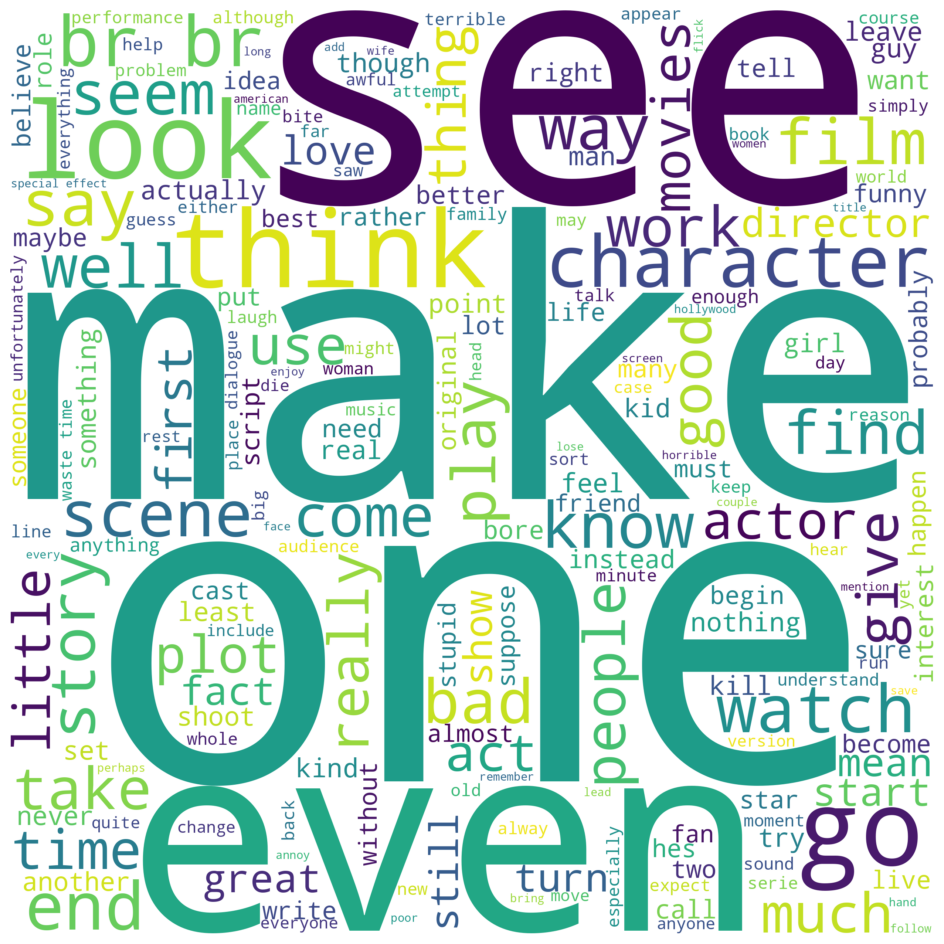

In [ ]:
# Creating a wordcloud for all negative sentiment tweets.
text = ' '.join(cl_df[cl_df['Sentiment'] == 'Negative']['cl_txt'])
cleaned_text = ' '.join(word for word in text.split()
                        if 'http' not in word
                        and not word.startswith('@')
                        and word.lower() != 'rt')

wordcloud = WordCloud(width=2500, height=2500, background_color='white').generate(cleaned_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

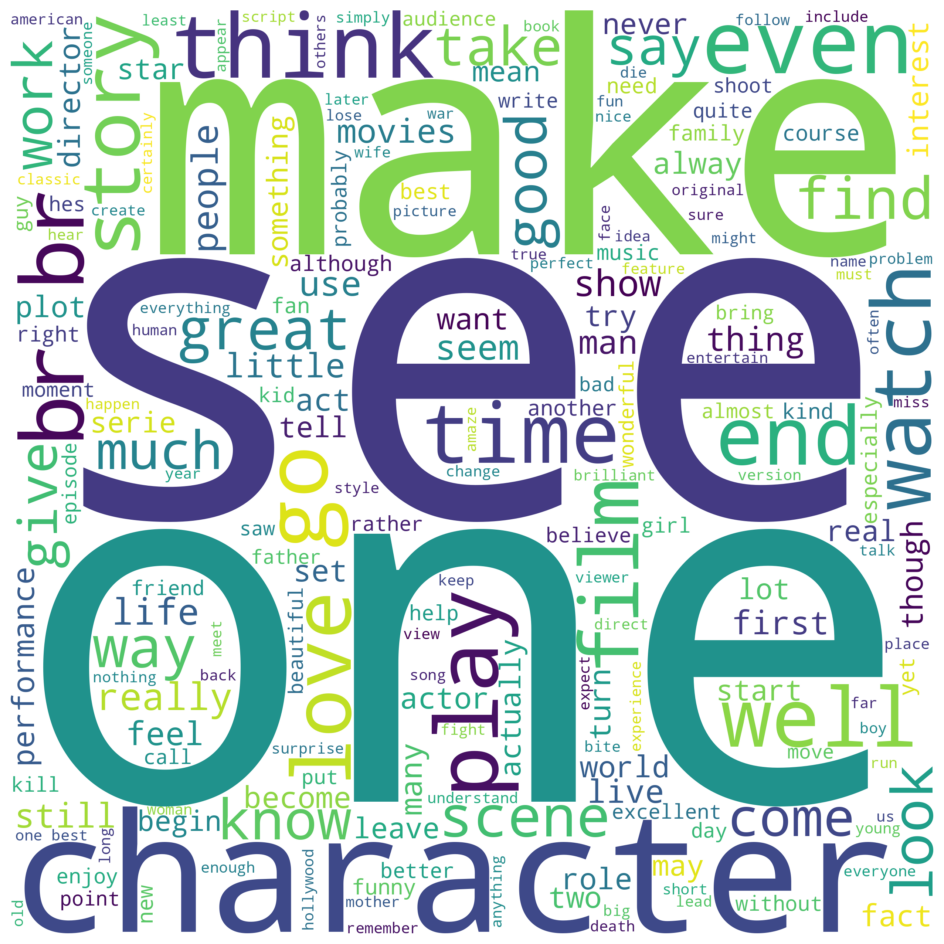

In [ ]:
# Creating a wordcloud for all positive sentiment tweets.
text = ' '.join(cl_df[cl_df['Sentiment'] == 'Positive']['cl_txt'])
cleaned_text = ' '.join(word for word in text.split()
                        if 'http' not in word
                        and not word.startswith('@')
                        and word.lower() != 'rt')

wordcloud = WordCloud(width=2500, height=2500, background_color='white').generate(cleaned_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Converting sentiments to 0s and 1s.
cl_df['Sentiment'] = cl_df['Sentiment'].apply(lambda x: 1 if x == "Negative" else 0)
cl_df

,Sentiment,cl_txt
0,0,bizarre fill famous face steal cristina rain later tvs flamingo road pretty somewhat unstable model gummy smile slat pay attempt suicides guard gateway hell scenes rain model well capture mood music perfect deborah raffin charm cristinas pal rain move creepy brooklyn heights brownstone inhabit blind priest top floor things really start cook neighbor include fantastically wicked burgess meredith kinky couple sylvia miles beverly dangelo diabolical lot eli wallach great fun wily police detective nearly crosspollination rosemarys baby exorcistbut combination base bestseller jeffrey konvitz sentinel entertainingly spooky full shock bring well director michael winner mount thoughtfully downbeat end skill
1,0,solid unremarkable matthau einstein wonderful favorite thing would make go way see wonderful scene physicists play badmitton love sweaters conversation wait robbins retrieve birdie
2,0,strange feel sit alone theater occupy parent rollick kid felt like instead ticket give nambla membershipbr br base upon thomas rockwells respect book eat fry worm start like childrens story move new town new kid fifth grader billy forrester popular start anew make friends never easy especially prospect poindexter adam erica feet giantbr br complicate things joe bully freckle face sleeveless shirt daunt antagonize kid death ring crackerjack ring rumor kill punch immediately death ring unleash poison kill eight gradebr br joe axis evil welcome billy smuggle handful slimy worm thermos discover billy play cool swear eat worm time throw joes face ewww win billy reluctantly bet eat worm fry boil marinate hot sauce squash spread peanut butter sandwich meal dub exotic name like radioactive slime delight kid finally live dream microwave live organismbr br ever meet know uncontrollably hearty laugh felt like creep erupt toddler whine dilly dick hurt fry worm wonderfully disgust like grate farrelly brothers vomitous delightfulbr br writerdirector bob dolman also savvy storyteller raise stake worm must consume pm addition billy hold dark secret ultrasensitive stomachbr br dolman also keen sense perspective accuracy draw childrens insecurities tendency exaggerate mundane dilemmasbr br hyperbolize way kid quandaries see essentially war freedomfighter freedomhater use pubescent boys pawn proxy war learn valuable lesson unity international leaders learn thing two global peacekeeping fry wormsbr br end comfort two chaperon mother behind look befuddlement agree great great register lawful databases
3,0,probably already know additional episodes never air view abccom watch lot television years possibly favorite ever crime beautifully write act cancel actors play laura whit carlos mae damian anya omg steven caseman incredible natural roles even kid great wonderful sad go course wonder reason cancel way ill let believe ms moynahans pregnancy anything perfect time slot market watch episodes abccom hope come dvd day thank read
4,0,saw two grow children although clever shrek think rather good surround children spring break sound know children like parent also seem engage death apparent death character bring appropriate gasp comment hopefully people realize make kid successful although like personally like scrat
...,...,...
49995,1,like get couple fleet glimpse cleavage attractive women may second two enjoyment enjoy see poorly conceive execute scenes plenty blind deaf still advise presence surely worst close worst ever see appear money spend talk throw money away editor would hope editors never allow edit book even postit note writer would hope author never allow near even break crayon would think recommend view tape may stop pain need educate bad
49996,1,something anything want mean bind register someone rather special shape cloud sky may appear one us remind us battleship another aunts rear yet another absolutely nothing cloud make cloud meaningful except viewers interpretation anyone might find throw stuff giraffe window brilliant worthwhile matt

In [ ]:
# Installing tensorflow.
!pip install tensorflow

In [ ]:
# Checking for any upgrades available in numpy.
!pip install --upgrade numpy

In [ ]:
# Importing the requisite packages used.
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Flatten
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [ ]:
texts = cl_df['cl_txt'].tolist()
labels = cl_df['Sentiment'].tolist()

# Tokenizing the text based on the dataset.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences based on the dataset.
max_sequence_length = 100  # You can adjust this as needed
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")

# Preparing the embedding matrix
word_index = tokenizer.word_index
embedding_dim = word2vec_model.vector_size
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.02368164,  0.10791016, -0.13574219, ..., -0.21386719,
        -0.08251953, -0.0168457 ],
       [ 0.0456543 , -0.14550781,  0.15625   , ..., -0.01586914,
         0.00671387, -0.00188446],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Splitting the data into training and testing datasets. We are considering 50% for training and 50% for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.30, random_state=42)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Embedding, BatchNormalization, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, BatchNormalization, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Layer, Attention
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

class Transformer_Layer(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(Transformer_Layer, self).__init__(**kwargs)
        self.att = Attention(use_scale=True)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim)]
        )
        self.layer_normalizing_1 = BatchNormalization(epsilon=1e-6)
        self.layer_normalizing_2 = BatchNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, data_inputs, training=None):
        attention_outputs = self.att([data_inputs, data_inputs])
        attention_outputs = self.dropout1(attention_outputs, training=training)
        output1 = self.layer_normalizing_1(data_inputs + attention_outputs)
        ffn_outputs = self.ffn(output1)
        ffn_outputs = self.dropout2(ffn_outputs, training=training)
        return self.layer_normalizing_2(output1 + ffn_outputs)

num_words = len(word_index) + 1

model = tf.keras.models.Sequential()

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=True))

model.add(Conv1D(256, kernel_size=5, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(256, kernel_size=3, activation="relu"))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Transformer_Layer(embed_dim=256, num_heads=2, ff_dim=64, rate=0.1))
model.add(BatchNormalization())
model.add(tf.keras.layers.Flatten())

model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          48751800  
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 256)           384256    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 48, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 46, 256)           196864    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 46, 256)           0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 46, 256)          

In [ ]:
print(type(X_train))
print(type(y_train))
print(X_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(35000, 100)


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert both y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
274/274 [==============================] - 621s 2s/step - loss: 0.8043 - accuracy: 0.7191 - val_loss: 0.7016 - val_accuracy: 0.8145
Epoch 2/10
274/274 [==============================] - 606s 2s/step - loss: 0.6144 - accuracy: 0.8316 - val_loss: 0.6353 - val_accuracy: 0.8441
Epoch 3/10
274/274 [==============================] - 565s 2s/step - loss: 0.5104 - accuracy: 0.8751 - val_loss: 0.5757 - val_accuracy: 0.8585
Epoch 4/10
274/274 [==============================] - 570s 2s/step - loss: 0.4256 - accuracy: 0.9105 - val_loss: 0.6955 - val_accuracy: 0.8318
Epoch 5/10
274/274 [==============================] - 604s 2s/step - loss: 0.3368 - accuracy: 0.9441 - val_loss: 0.7745 - val_accuracy: 0.8367
Epoch 6/10
274/274 [==============================] - 566s 2s/step - loss: 0.2617 - accuracy: 0.9682 - val_loss: 0.7895 - val_accuracy: 0.8477
Epoch 7/10
274/274 [==============================] - 604s 2s/step - loss: 0.2132 - accuracy: 0.9807 - val_loss: 0.7587 - val_accuracy: 0.8528

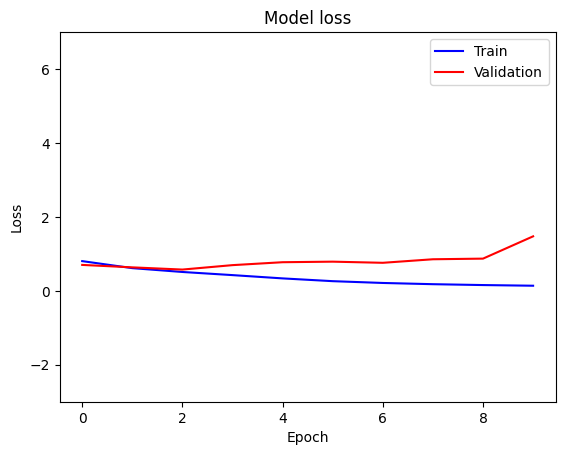

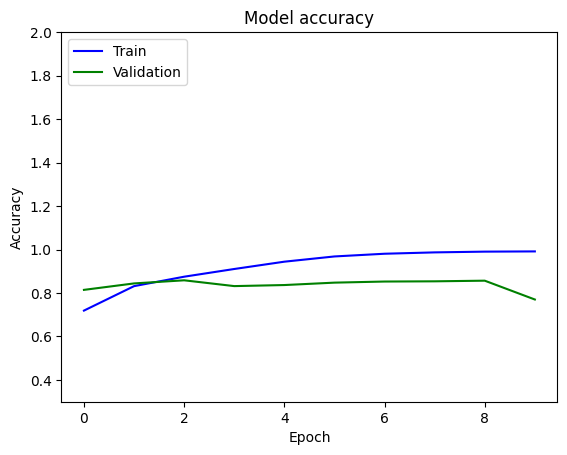

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylim(-3, 7)
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], color ='blue')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0.3, 2)
plt.show()

In [ ]:
predictions = model.predict(X_test)

469/469 [==============================] - 54s 112ms/step


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8584666666666667
F1 Score: 0.8522513744867425
Precision: 0.8840600635287323
Recall: 0.822652156388553
